Clase de Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Databases/vehicles_messy.csv', nrows=1000)
data = pd.read_csv('/content/drive/MyDrive/Databases/vehicles_messy.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
len(data)

37843

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        1000 non-null   float64
 1   barrelsA08       1000 non-null   float64
 2   charge120        1000 non-null   float64
 3   charge240        1000 non-null   float64
 4   city08           1000 non-null   int64  
 5   city08U          1000 non-null   float64
 6   cityA08          1000 non-null   int64  
 7   cityA08U         1000 non-null   float64
 8   cityCD           1000 non-null   float64
 9   cityE            1000 non-null   float64
 10  cityUF           1000 non-null   float64
 11  co2              1000 non-null   int64  
 12  co2A             1000 non-null   int64  
 13  co2TailpipeAGpm  1000 non-null   float64
 14  co2TailpipeGpm   1000 non-null   float64
 15  comb08           1000 non-null   int64  
 16  comb08U          1000 non-null   float64
 17  combA08        

In [ ]:
data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,37843.000000,37843.000000,37843.0,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37720.000000,37723.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.00000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000
mean,17.532506,0.216169,0.0,0.023531,17.941389,4.042737,0.520149,0.327163,0.000406,0.184790,0.000706,61.503713,5.349919,17.771433,473.179736,20.195809,4.549751,0.581191,0.359027,0.190575,0.000335,0.000691,5.737990,3.318180,8860.308961,-0.035145,1882.060090,79.070105,-0.037206,-0.929630,24.104881,5.438467,0.686891,0.418698,0.000233,0.198247,0.000673,2.026214,10.424332,19019.286235,1.849219,6.165658,13.696113,33.769125,0.392675,0.352618,0.03680,0.343399,0.033475,22.587229,0.652380,33.619221,0.933845,2000.064398,-2658.999022,0.004360,0.069313,0.068203,0.068573
std,4.575950,1.141527,0.0,0.427647,6.660360,9.645820,3.837874,3.542596,0.039918,2.904558,0.019458,153.387715,55.539497,94.129283,122.188847,6.623444,10.389994,3.966255,3.589260,2.979567,0.035284,0.019049,1.751795,1.361399,17829.683477,2.379584,510.280408,417.668580,2.374338,0.627565,6.963192,11.936327,4.308934,3.808877,0.029564,3.091862,0.018583,5.947989,28.148770,11034.784855,4.429983,9.743297,31.269930,45.914462,8.251191,8.049082,1.15827,8.171939,1.032642,9.350163,5.284547,10.048326,6.059456,10.390588,2553.098329,0.142776,1.966806,1.871986,1.913647
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-1.000000,550.000000,0.000000,-1.000000,-1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1984.000000,-22250.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,388.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.200000,0.000000,-1.000000,1500.000000,0.000000,-1.000000,-1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9461.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.000000,0.000000,27.100000,0.000000,1990.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,467.736842,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,211.000000,-1.000000,1850.000000,0.000000,-1.000000,-1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18923.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,21.000000,0.000000,33.000000,0.000000,2001.000000,-2500

In [ ]:
data.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31705
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

In [ ]:
cols_nulls = data.isnull().sum()
cols_nulls[cols_nulls>0] 


cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [ ]:
cols_delete = list(cols_nulls[cols_nulls>10000].index)
data = data.drop(cols_delete, axis=1)
print(data.shape)

(37843, 70)


In [ ]:
data[['year','make','model','trany','fuelType','cylinders','displ']]

,year,make,model,trany,fuelType,cylinders,displ
0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Regular,4.0,2.0
1,1985,Ferrari,Testarossa,Manual 5-spd,Regular,12.0,4.9
2,1985,Dodge,Charger,Manual 5-spd,Regular,4.0,2.2
3,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Regular,8.0,5.2
4,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,Premium,4.0,2.2
...,...,...,...,...,...,...,...
37838,1993,Subaru,Legacy,Automatic 4-spd,Regular,4.0,2.2
37839,1993,Subaru,Legacy,Manual 5-spd,Regular,4.0,2.2
37840,1993,Subaru,Legacy AWD,Automatic 4-spd,Regular,4.0,2.2
37841,1993,Subaru,Legacy AWD,Manual 5-spd,Regular,4.0,2.2


In [ ]:
disp_null = data[(data['displ']==True)]
disp_null[['year','make','model','trany','fuelType','cylinders','displ']]


,year,make,model,trany,fuelType,cylinders,displ
775,1994,Chevrolet,Sprint,Automatic 3-spd,Regular,3.0,1.0
776,1994,Chevrolet,Sprint,Manual 5-spd,Regular,3.0,1.0
822,1994,Geo,Metro,Automatic 3-spd,Regular,3.0,1.0
823,1994,Geo,Metro,Manual 5-spd,Regular,3.0,1.0
825,1994,Geo,Metro XFI,Manual 5-spd,Regular,3.0,1.0
...,...,...,...,...,...,...,...
37581,1993,Geo,Metro LSI,Automatic 3-spd,Regular,3.0,1.0
37582,1993,Geo,Metro LSI,Manual 5-spd,Regular,3.0,1.0
37583,1993,Geo,Metro XFI,Manual 5-spd,Regular,3.0,1.0
37690,1993,Suzuki,Swift,Automatic 3-spd,Regular,3.0,1.0


In [ ]:
disp_null['fuelType'].value_counts()

Regular    7
Name: fuelType, dtype: int64

In [ ]:
data[['displ','cylinders']] = data[['displ','cylinders']].fillna(0)

In [ ]:
data[(data['displ']==True)]

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,...,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
775,9.988182,0.0,0.0,0.0,31,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,269.303030,33,0.0,0,0.0,0.0,0.0,0.0,3,1.0,Front-Wheel Drive,54003,(FFS),-1,1000,0,Regular,Regular Gasoline,-1,-1,36,0.0,0,0.0,0.0,0.0,...,10696,0,0,Chevrolet,Sprint,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,40.0000,0.0,51.0000,0.0,Subcompact Cars,1994,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
776,8.039268,0.0,0.0,0.0,38,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,216.756098,41,0.0,0,0.0,0.0,0.0,0.0,3,1.0,Front-Wheel Drive,54003,(FFS),-1,800,0,Regular,Regular Gasoline,-1,-1,45,0.0,0,0.0,0.0,0.0,...,10697,0,0,Chevrolet,Sprint,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,51.0000,0.0,64.0000,0.0,Subcompact Cars,1994,2750,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
822,9.988182,0.0,0.0,0.0,31,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,269.303030,33,0.0,0,0.0,0.0,0.0,0.0,3,1.0,Front-Wheel Drive,54002,(FFS),-1,1000,0,Regular,Regular Gasoline,-1,-1,35,0.0,0,0.0,0.0,0.0,...,10738,0,0,Geo,Metro,Y,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,40.0000,0.0,50.0000,0.0,Subcompact Cars,1994,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
823,8.240250,0.0,0.0,0.0,38,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,222.175000,40,0.0,0,0.0,0.0,0.0,0.0,3,1.0,Front-Wheel Drive,54002,(FFS),-1,850,0,Regular,Regular Gasoline,-1,-1,44,0.0,0,0.0,0.0,0.0,...,10739,0,0,Geo,Metro,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,51.0000,0.0,63.0000,0.0,Subcompact Cars,1994,2500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
825,7.012979,0.0,0.0,0.0,43,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,189.085106,47,0.0,0,0.0,0.0,0.0,0.0,3,1.0,Front-Wheel Drive,54001,(FFS),-1,700,0,Regular,Regular Gasoline,-1,-1,52,0.0,0,0.0,0.0,0.0,...,10740,0,0,Geo,Metro XFI,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,59.1553,0.0,74.7877,0.0,Subcompact Cars,1994,3250,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
898,9.988182,0.0,0.0,0.0,31,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,269.303030,33,0.0,0,0.0,0.0,0.0,0.0,3,1.0,Front-Wheel Drive,54003,(FFS),-1,1000,0,Regular,Regular Gasoline,-1,-1,36,0.0,0,0.0,0.0,0.0,...,10806,0,0,Pontiac,Firefly,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,40.0000,0.0,51.0000,0.0,Subcompact Cars,1994,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
899,8.039268,0.0,0.0,0.0,38,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,216.756098,41,0.0,0,0.0,0.0,0.0,0.0,3,1.0,Front-Wheel Drive,54003,(FFS),-1,800,0,Regular,Regular Gasoline,-1,-1,45,0.0,0,0.0,0.0,0.0,...,10807,0,0,Pontiac,Firefly,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,51.0000,0.0,64.0000,0.0,Subcompact Cars,1994,2750,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [ ]:
test = data.loc[(data['cylinders']==0) & (data['fuelType']=='Regular')]
test[['year','make','model','trany','fuelType','cylinders','displ']]

,year,make,model,trany,fuelType,cylinders,displ
21413,1985,Subaru,RX Turbo,Manual 5-spd,Regular,0.0,0.0
21414,1985,Subaru,RX Turbo,Manual 5-spd,Regular,0.0,0.0
21506,1986,Mazda,RX-7,Manual 5-spd,Regular,0.0,1.3


In [ ]:
#nos ayuda a navegar en los indices
data.loc[(data['cylinders']==0)&(data['fuelType']=='Regular') & (data['make']=='Subaru'), 'cylinders']=4

In [ ]:
data[(data['cylinders']==0)&(data['fuelType']=='Regular')] 

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb


In [ ]:
data[(data['cylinders']==5)&(data['fuelType']=='Regular') & (data['make']=='Mazda')]

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
21506,18.311667,0.0,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,493.722222,18,0.0,0,0.0,0.0,0.0,0.0,5.0,1.3,Rear-Wheel Drive,0,-1,1850,0,Regular,Regular Gasoline,-1,-1,22,0.0,0,0.0,0.0,0.0,0.0,0,0,29557,0,0,Mazda,RX-7,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,19.0473,0.0,31.1094,0.0,Two Seaters,1986,-2500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


In [ ]:
cols_nulls[(cols_nulls>0) & (cols_nulls<10000)]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

In [ ]:
data = data.drop(data[data['trany'].isnull()==True].index, axis=0)
print(data.shape)

(37832, 70)


In [ ]:
cols_nulls[(cols_nulls>0) & (cols_nulls<10000)]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

In [ ]:
# percentiles

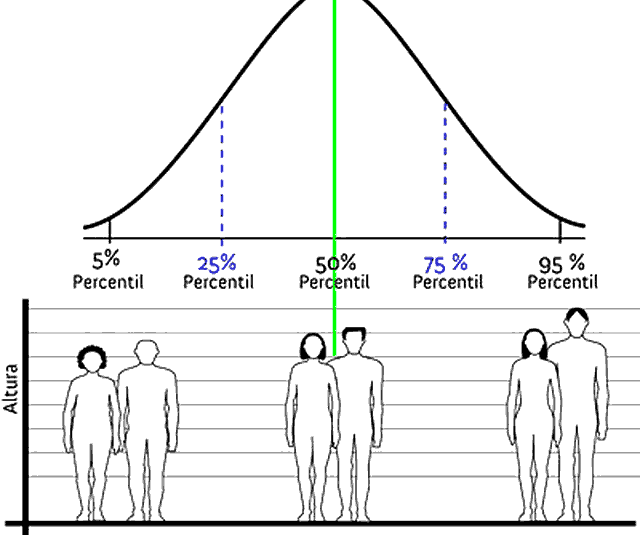

In [ ]:
import numpy as np
varianza_bajo = []
for columna in data._get_numeric_data():
  minimo = min(data[columna])
  percentil_90 = np.percentile(data[columna],90)
  if percentil_90 == minimo:
    varianza_bajo.append(columna)
varianza_bajo    


['barrelsA08',
 'charge120',
 'charge240',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2A',
 'co2TailpipeAGpm',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'fuelCostA08',
 'ghgScoreA',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'phevBlended',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'UCityA',
 'UHighwayA',
 'charge240b',
 'phevCity',
 'phevHwy',
 'phevComb']

In [ ]:
print(data.shape)
data = data.drop(varianza_bajo, axis=1)
print(data.shape)

(37832, 70)
(37832, 36)


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
barrels08,37832.0,17.536112,4.568362,0.06,14.33087,17.347895,20.600625,47.087143
city08,37832.0,17.928394,6.600502,6.00,15.00000,17.000000,20.000000,138.000000
city08U,37832.0,4.043912,9.646976,0.00,0.00000,0.000000,0.000000,138.304000
co2,37832.0,61.521648,153.406406,-1.00,-1.00000,-1.000000,-1.000000,847.000000
co2TailpipeGpm,37832.0,473.279183,121.973473,0.00,388.00000,467.736842,555.437500,1269.571429
comb08,37832.0,20.185081,6.580177,7.00,17.00000,19.000000,23.000000,124.000000
comb08U,37832.0,4.551074,10.391215,0.00,0.00000,0.000000,0.000000,124.360100
cylinders,37832.0,5.720977,1.776528,0.00,4.00000,6.000000,6.000000,16.000000
displ,37832.0,3.308358,1.371166,0.00,2.20000,3.000000,4.300000,8.400000
engId,37832.0,8862.655160,17831.721085,0.00,0.00000,212.000000,4505.250000,69102.000000


In [ ]:
# grafica de bigotes

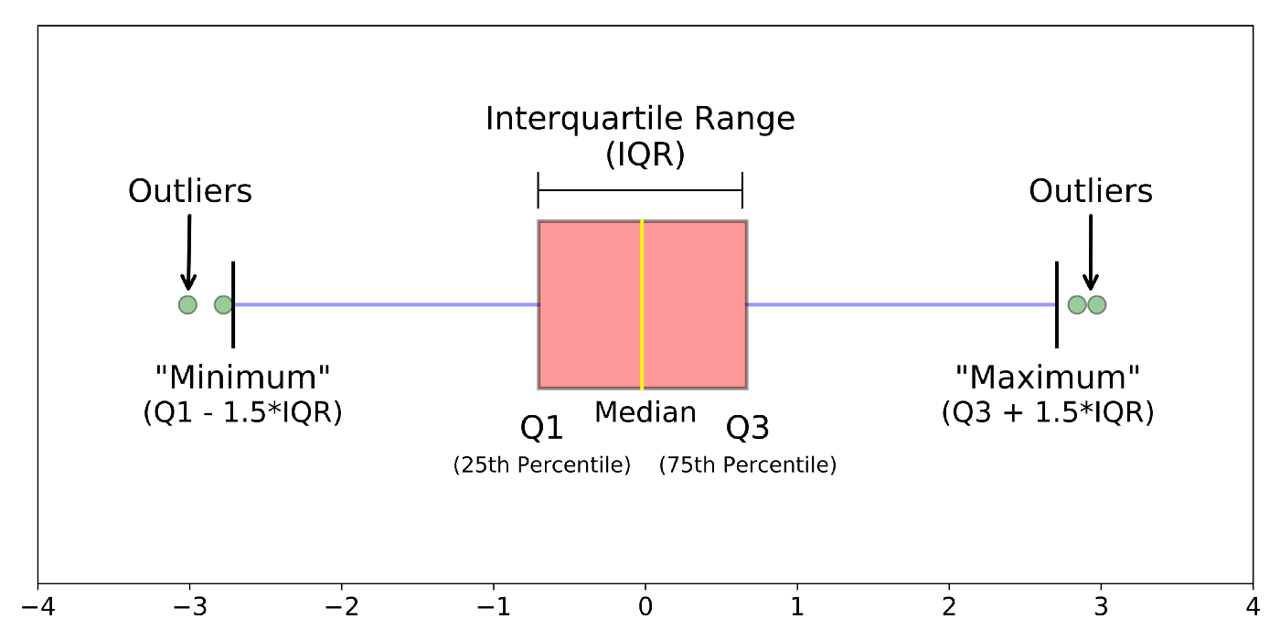

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
barrels08,37832.0,17.536112,4.568362,0.06,14.33087,17.347895,20.600625,47.087143
city08,37832.0,17.928394,6.600502,6.00,15.00000,17.000000,20.000000,138.000000
city08U,37832.0,4.043912,9.646976,0.00,0.00000,0.000000,0.000000,138.304000
co2,37832.0,61.521648,153.406406,-1.00,-1.00000,-1.000000,-1.000000,847.000000
co2TailpipeGpm,37832.0,473.279183,121.973473,0.00,388.00000,467.736842,555.437500,1269.571429
comb08,37832.0,20.185081,6.580177,7.00,17.00000,19.000000,23.000000,124.000000
comb08U,37832.0,4.551074,10.391215,0.00,0.00000,0.000000,0.000000,124.360100
cylinders,37832.0,5.720977,1.776528,0.00,4.00000,6.000000,6.000000,16.000000
displ,37832.0,3.308358,1.371166,0.00,2.20000,3.000000,4.300000,8.400000
engId,37832.0,8862.655160,17831.721085,0.00,0.00000,212.000000,4505.250000,69102.000000


In [ ]:
# rango intercuantil = Q3 - Q1
# minimo = Q1 - (rango intercuantil * 1.5)
# maximo = Q3 + (rango intercuantil * 1.5)

In [ ]:
estadisticos = data.describe().transpose()
estadisticos['IQR'] = estadisticos['75%'] - estadisticos['25%']
estadisticos

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,37832.0,17.536112,4.568362,0.06,14.33087,17.347895,20.600625,47.087143,6.269755
city08,37832.0,17.928394,6.600502,6.00,15.00000,17.000000,20.000000,138.000000,5.000000
city08U,37832.0,4.043912,9.646976,0.00,0.00000,0.000000,0.000000,138.304000,0.000000
co2,37832.0,61.521648,153.406406,-1.00,-1.00000,-1.000000,-1.000000,847.000000,0.000000
co2TailpipeGpm,37832.0,473.279183,121.973473,0.00,388.00000,467.736842,555.437500,1269.571429,167.437500
comb08,37832.0,20.185081,6.580177,7.00,17.00000,19.000000,23.000000,124.000000,6.000000
comb08U,37832.0,4.551074,10.391215,0.00,0.00000,0.000000,0.000000,124.360100,0.000000
cylinders,37832.0,5.720977,1.776528,0.00,4.00000,6.000000,6.000000,16.000000,2.000000
displ,37832.0,3.308358,1.371166,0.00,2.20000,3.000000,4.300000,8.400000,2.100000
engId,37832.0,8862.655160,17831.721085,0.00,0.00000,212.000000,4505.250000,69102.000000,4505.250000


In [ ]:
outliers = pd.DataFrame(columns=data.columns)
for col in estadisticos.index:
  iqr = estadisticos.at[col, 'IQR']
  corte = iqr*1.5
  lower = estadisticos.at[col, '25%'] - corte
  upper = estadisticos.at[col, '25%'] + corte
  resultados = data[(data[col] < lower) | (data[col]>upper)].copy()
  resultados['Outlier'] = col
  outliers = outliers.append(resultados)
outliers  

,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,drive,engId,feScore,fuelCost08,fuelType,fuelType1,ghgScore,highway08,highway08U,hlv,hpv,id,lv2,lv4,make,model,mpgData,pv2,pv4,trany,UCity,UHighway,VClass,year,youSaveSpend,createdOn,modifiedOn,Outlier
1,29.964545,9,0.0,-1,807.909091,11,0.0,12.0,4.9,Rear-Wheel Drive,22020,-1,3050,Regular,Regular Gasoline,-1,14,0.0,0,0,10,0,0,Ferrari,Testarossa,N,0,0,Manual 5-spd,11.0000,19.0000,Two Seaters,1985,-8500,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08
3,29.964545,10,0.0,-1,807.909091,11,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,3050,Regular,Regular Gasoline,-1,12,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,0,0,Automatic 3-spd,12.2222,16.6667,Vans,1985,-8500,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08
14,25.354615,12,0.0,-1,683.615385,13,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,2550,Regular,Regular Gasoline,-1,15,0.0,0,0,1001,0,0,Dodge,B150/B250 Wagon 2WD,N,0,0,Automatic 3-spd,14.4444,21.0000,Vans,1985,-6000,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08
22,25.354615,11,0.0,-1,683.615385,13,0.0,12.0,5.0,Rear-Wheel Drive,12080,-1,2550,Regular,Regular Gasoline,-1,17,0.0,0,0,10017,0,13,BMW,750il,N,0,105,Automatic 4-spd,13.3333,23.0000,Midsize Cars,1993,-6000,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08
25,25.354615,11,0.0,-1,683.615385,13,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,2550,Regular,Regular Gasoline,-1,17,0.0,0,0,1002,0,0,Dodge,B150/B250 Wagon 2WD,N,0,0,Manual 4-spd,14.0000,23.0000,Vans,1985,-6000,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37691,8.039268,38,0.0,-1,216.756098,41,0.0,3.0,1.0,Front-Wheel Drive,54003,-1,800,Regular,Regular Gasoline,-1,45,0.0,10,82,9862,0,12,Suzuki,Swift,N,0,83,Manual 5-spd,51.0000,64.0000,Subcompact Cars,1993,2750,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,youSaveSpend
37693,9.417429,33,0.0,-1,253.914286,35,0.0,4.0,1.3,Front-Wheel Drive,54006,-1,950,Regular,Regular Gasoline,-1,39,0.0,10,82,9864,0,12,Suzuki,Swift,Y,0,83,Manual 5-spd,43.0000,55.0000,Subcompact Cars,1993,2000,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,youSaveSpend
37756,10.987000,26,0.0,-1,296.233333,30,0.0,4.0,1.9,Front-Wheel Drive,3100,-1,1100,Regular,Regular Gasoline,-1,35,0.0,17,91,9920,0,0,Ford,Escort FS,N,0,0,Manual 5-spd,34.0000,50.0000,Compact Cars,1993,1250,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,youSaveSpend
37826,10.987000,26,0.0,-1,296.233333,30,0.0,4.0,1.6,Front-Wheel Drive,4101,-1,1100,Regular,Regular Gasoline,-1,37,0.0,19,89,9984,0,17,Pontiac,Lemans,N,0,89,Manual 5-spd,34.0000,52.0000,Compact Cars,1993,1250,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,youSaveSpend


In [ ]:
data.dtypes

barrels08         float64
city08              int64
city08U           float64
co2                 int64
co2TailpipeGpm    float64
comb08              int64
comb08U           float64
cylinders         float64
displ             float64
drive              object
engId               int64
feScore             int64
fuelCost08          int64
fuelType           object
fuelType1          object
ghgScore            int64
highway08           int64
highway08U        float64
hlv                 int64
hpv                 int64
id                  int64
lv2                 int64
lv4                 int64
make               object
model              object
mpgData            object
pv2                 int64
pv4                 int64
trany              object
UCity             float64
UHighway          float64
VClass             object
year                int64
youSaveSpend        int64
createdOn          object
modifiedOn         object
dtype: object

In [ ]:
data['year'] = data['year'].astype('object')

In [ ]:
set(data['trany'])

{'Auto (AV)',
 'Auto (AV-S6)',
 'Auto (AV-S8)',
 'Auto(A1)',
 'Auto(AM-S6)',
 'Auto(AM-S7)',
 'Auto(AM-S8)',
 'Auto(AM-S9)',
 'Auto(AM5)',
 'Auto(AM6)',
 'Auto(AM7)',
 'Auto(AM8)',
 'Auto(AV-S6)',
 'Auto(AV-S7)',
 'Auto(AV-S8)',
 'Auto(L3)',
 'Auto(L4)',
 'Automatic (A1)',
 'Automatic (A6)',
 'Automatic (AM5)',
 'Automatic (AM6)',
 'Automatic (AV)',
 'Automatic (AV-S6)',
 'Automatic (S4)',
 'Automatic (S5)',
 'Automatic (S6)',
 'Automatic (S7)',
 'Automatic (S8)',
 'Automatic (S9)',
 'Automatic (variable gear ratios)',
 'Automatic 3-spd',
 'Automatic 4-spd',
 'Automatic 5-spd',
 'Automatic 6-spd',
 'Automatic 6spd',
 'Automatic 7-spd',
 'Automatic 8-spd',
 'Automatic 9-spd',
 'Manual 3-spd',
 'Manual 4-spd',
 'Manual 4-spd Doubled',
 'Manual 5 spd',
 'Manual 5-spd',
 'Manual 6-spd',
 'Manual 7-spd',
 'Manual(M7)'}

In [ ]:
data.trany.unique()

array(['Manual 5-spd', 'Automatic 3-spd', 'Automatic 4-spd',
       'Automatic 5-spd', 'Manual 4-spd', 'Manual 3-spd', 'Manual 6-spd',
       'Automatic (S5)', 'Automatic (variable gear ratios)',
       'Automatic 6-spd', 'Automatic (S6)', 'Automatic (S4)',
       'Automatic 7-spd', 'Automatic (S7)', 'Automatic (S8)',
       'Automatic (AM5)', 'Auto(AM6)', 'Auto(AV-S7)', 'Automatic (A6)',
       'Automatic (AV-S6)', 'Auto(AM7)', 'Manual 4-spd Doubled',
       'Manual 5 spd', 'Automatic (AM6)', 'Manual 7-spd', 'Auto(L4)',
       'Auto(L3)', 'Automatic (AV)', 'Auto (AV-S6)', 'Auto(AM5)',
       'Auto(AV-S6)', 'Auto (AV-S8)', 'Automatic 8-spd', 'Auto(AV-S8)',
       'Automatic (A1)', 'Auto (AV)', 'Auto(AM-S6)', 'Auto(AM-S7)',
       'Automatic 6spd', 'Automatic 9-spd', 'Automatic (S9)',
       'Auto(AM-S8)', 'Auto(A1)', 'Auto(AM8)', 'Manual(M7)',
       'Auto(AM-S9)'], dtype=object)

In [ ]:
data['trany'] = data['trany'].str.replace('Automatic','Auto')
data.trany.unique()

array(['Manual 5-spd', 'Auto 3-spd', 'Auto 4-spd', 'Auto 5-spd',
       'Manual 4-spd', 'Manual 3-spd', 'Manual 6-spd', 'Auto (S5)',
       'Auto (variable gear ratios)', 'Auto 6-spd', 'Auto (S6)',
       'Auto (S4)', 'Auto 7-spd', 'Auto (S7)', 'Auto (S8)', 'Auto (AM5)',
       'Auto(AM6)', 'Auto(AV-S7)', 'Auto (A6)', 'Auto (AV-S6)',
       'Auto(AM7)', 'Manual 4-spd Doubled', 'Manual 5 spd', 'Auto (AM6)',
       'Manual 7-spd', 'Auto(L4)', 'Auto(L3)', 'Auto (AV)', 'Auto(AM5)',
       'Auto(AV-S6)', 'Auto (AV-S8)', 'Auto 8-spd', 'Auto(AV-S8)',
       'Auto (A1)', 'Auto(AM-S6)', 'Auto(AM-S7)', 'Auto 6spd',
       'Auto 9-spd', 'Auto (S9)', 'Auto(AM-S8)', 'Auto(A1)', 'Auto(AM8)',
       'Manual(M7)', 'Auto(AM-S9)'], dtype=object)

In [ ]:
data.shape

(37832, 36)

In [ ]:
print(len(data))
data = data.drop_duplicates()
print(len(data))


37832
37832


In [ ]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders',
                  'trany', 'drive', 'VClass','fuelType','barrels08',
                  'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']
print(len(data))
data = data[select_columns].drop_duplicates()
print(len(data))

37832
36947


In [ ]:
data.shape

(36947, 15)

# Data Pipeline